In [30]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
world_earthquakes = pd.read_csv('../data/world_earthquakes_06_clean.csv')
world_earthquakes

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths
0,1900-05-11 17:23:00,1900,5,11,17:23:00,Japan,38.700,141.100,5.0,7.0,NaN,0
1,1900-07-12 06:25:00,1900,7,12,06:25:00,Turkey,40.300,43.100,NaN,5.9,NaN,140
2,1900-10-29 09:11:00,1900,10,29,09:11:00,Venezuela,11.000,-66.000,0.0,7.7,NaN,0
3,1901-02-15 00:00:00,1901,2,15,00:00:00,China,26.000,100.100,0.0,6.5,NaN,0
4,1901-03-31 07:11:00,1901,3,31,07:11:00,Bulgaria,43.400,28.700,NaN,6.4,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,2011-03-24 20:25:00,2011,3,24,20:25:00,Burma,NaN,NaN,NaN,6.8,NaN,150
1336,2011-04-07 14:32:00,2011,4,7,14:32:00,Japan,38.200,140.000,66.0,7.1,NaN,0
1337,2011-09-18 12:40:00,2011,9,18,12:40:00,India,27.723,88.064,19.7,6.9,landslide,111
1338,2011-09-23 10:41:00,2011,9,23,10:41:00,Turkey,38.600,43.500,7.2,7.1,NaN,601


# As relates to New Madrid fault and Tennessee areas, are there factors that make an earthquake more likely?  Are there factors that make an earthquake more deadly?

In [3]:
Japan = world_earthquakes[world_earthquakes['country'].str.contains('Japan')]
Japan.head()

,date,year,month,day,time,country,latitude,longitude,depth,magnitude,secondary_effects,deaths
0,1900-05-11 17:23:00,1900,5,11,17:23:00,Japan,38.7,141.1,5.0,7.0,NaN,0
5,1901-08-09 09:23:00,1901,8,9,09:23:00,Japan,40.5,142.5,35.0,7.2,tsunami,0
7,1902-01-30 14:01:00,1902,1,30,14:01:00,Japan,40.5,141.3,35.0,6.9,NaN,1
26,1905-06-02 05:39:00,1905,6,2,05:39:00,Japan,34.1,132.5,55.0,7.0,NaN,11
50,1909-08-14 06:31:00,1909,8,14,06:31:00,Japan,35.4,136.3,5.0,6.7,NaN,41


Text(0.5, 1.0, "Magnitudes of Japan's Quakes since 1900")

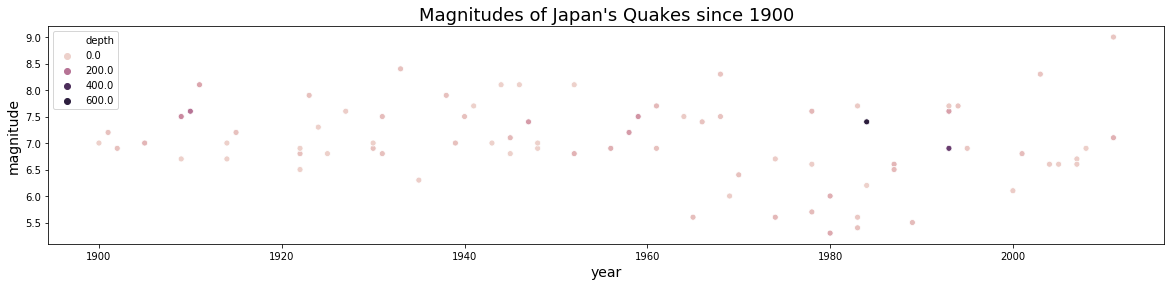

In [32]:
plt.figure(figsize=(20,4)) 
sns.scatterplot(data = Japan, x = 'year', y = 'magnitude', hue = 'depth')
plt.xlabel('year', size = 14)
plt.ylabel('magnitude', size = 14)
plt.title("Magnitudes of Japan's Quakes since 1900", size=18)

Text(0.5, 1.0, "Magnitudes of Japan's Quakes since 1900")

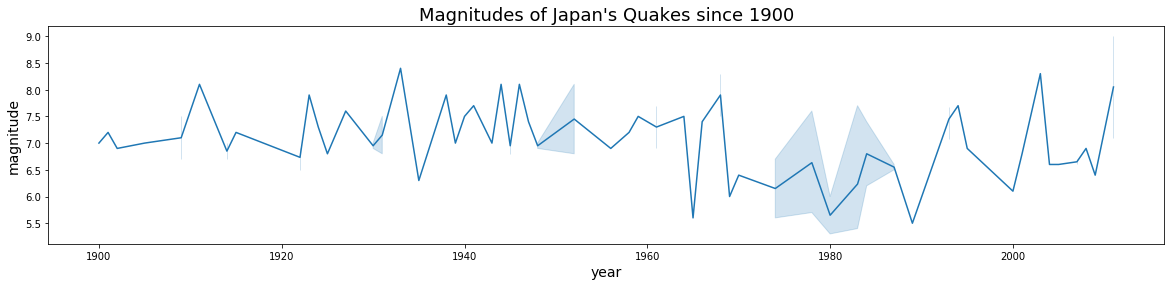

In [29]:
plt.figure(figsize=(20,4)) 
sns.lineplot(data = Japan, x = 'year', y = 'magnitude')
plt.xlabel('year', size = 14)
plt.ylabel('magnitude', size = 14)
plt.title("Magnitudes of Japan's Quakes since 1900", size=18)

New Madrid area (NW corner of TN), being a reverse fault, has high potential to cause magnutide 8.0 or higher, while srike-slip fault segments directly east of the state are dangerous, but cap-out in the magnitude 8 range.  Looking at pattern of quakes in Japan's history (this convergent boundry includes a number of inland reverse faults), there may be some tendency toward higher-magnitude events in the few years following lower-mag events, but this is not entirely clear.  The East Tennessee Seismic Zone's geological ambiguity, both structural and dynamic (see excerpt at very end of this notebook) make this region equally difficult to predict.  The only factors certain to 'make an earthquake more likely' are proximity in both time and location to other major events, and perhaps following some frequency for events of a given magnitude.

In [33]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://cdn.britannica.com/s:700x500/25/138725-050-43341935/Map-earthquakes-New-Madrid.jpg")

In [34]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://static.temblor.net/wp-content/uploads/2020/08/Fig26_earthquake-map-withmercalli-scale.jpg")

Based on the above maps of intensity of earthquakes in recent centuries, should either or both of the two seismic areas produce a major event in the next *n* years, the following metro areas should plan for similar intiensities (Mercalli ranging from I to X) given *one* of the 3 scenarios:

(team: make into table or df?  I have added the plus when bordering on higher category, keep these?)

New Madrid Seismic Zone ONLY:  
Memphis: IX+ (violent+)  
Nashville: VII (very strong)  
Chattanooga: VI+ (strong+)  
Knoxville: VI (strong)

East Tennessee Seismic Zone ONLY:  
Memphis: I (not felt)  
Nashville: II+ (weak+)  
Chattanooga: V+ (moderate+)  
Knoxville: VI (strong)

Resulting Effects of NEXT major Tennessee Event (if each zone is equally likely to produce it):  
Memphis: 50% chance of any, although violent or worse effects.  
Nashville: 90+% chance of at least weak effects, 50% chance very strong.  
Chattanooga: 90+% chance of at least modrate/strong effects, 50% chance strong/very strong.  
Knoxville: 90+% chance of strong effects.

Ideally, if we were to plan for the next major events by *both* zones, and to prepare for one level *beyond* expected intensity given the very limited historical data:  
Memphis: X (extreme)  
Nashville: VIII (severe)  
Chattanooga: VII (very strong)  
Knoxville: VII (very strong)

So, in public education, public spaces, certain civil engineering and regulatory decisions that may not be as budget-involved as renovation and emergency resource stores, these higher levels of preparedness are advised.

"At well-studied plate boundaries like the San Andreas fault system in California, often scientists can determine the name of the specific fault that is responsible for an earthquake. In contrast, east of the Rocky Mountains this is rarely the case. The Eastern Tennessee seismic zone is far from the nearest plate boundaries, which are in the center of the Atlantic Ocean and in the Caribbean Sea. The Eastern Tennessee seismic zone is laced with known faults but numerous smaller or deeply buried faults remain undetected. Even the known faults are poorly located at earthquake depths. Accordingly, few, if any, earthquakes in the Eastern Tennessee seismic zone can be linked to named faults. It is difficult to determine if a known fault is still active and could slip and cause an earthquake. As in most other areas east of the Rockies, the best guide to earthquake hazards in the seismic zone is the earthquakes themselves."
https://earthquake.usgs.gov/earthquakes/eventpage/se60100238/region-info